In [80]:
#Data manipulation
import numpy as np 
import pandas as pd
import sklearn
from itertools import cycle

In [81]:
# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [82]:
# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [83]:
# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError

In [84]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [85]:
# Importing Models
from sklearn.decomposition import PCA

# Importing Models

from sklearn.neighbors import KNeighborsClassifier as KNN #K-Nearest Neighbors
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
#Loading dataset
wine = pd.read_excel('C:/Users/manas/Projects/Wine Quality Prediction/winequality-red.xlsx')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [87]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [88]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64


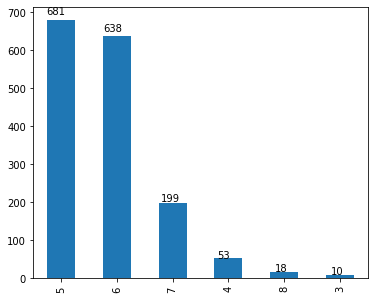

In [89]:
# Checking dataset for Skewness
ax = wine["quality"].value_counts().plot.bar(figsize=(6,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
print(wine["quality"].value_counts(normalize=True)*100)

In [90]:
# Exploring Features
features = wine.columns[:-2]
output = wine.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates'], 

Labels: 
quality


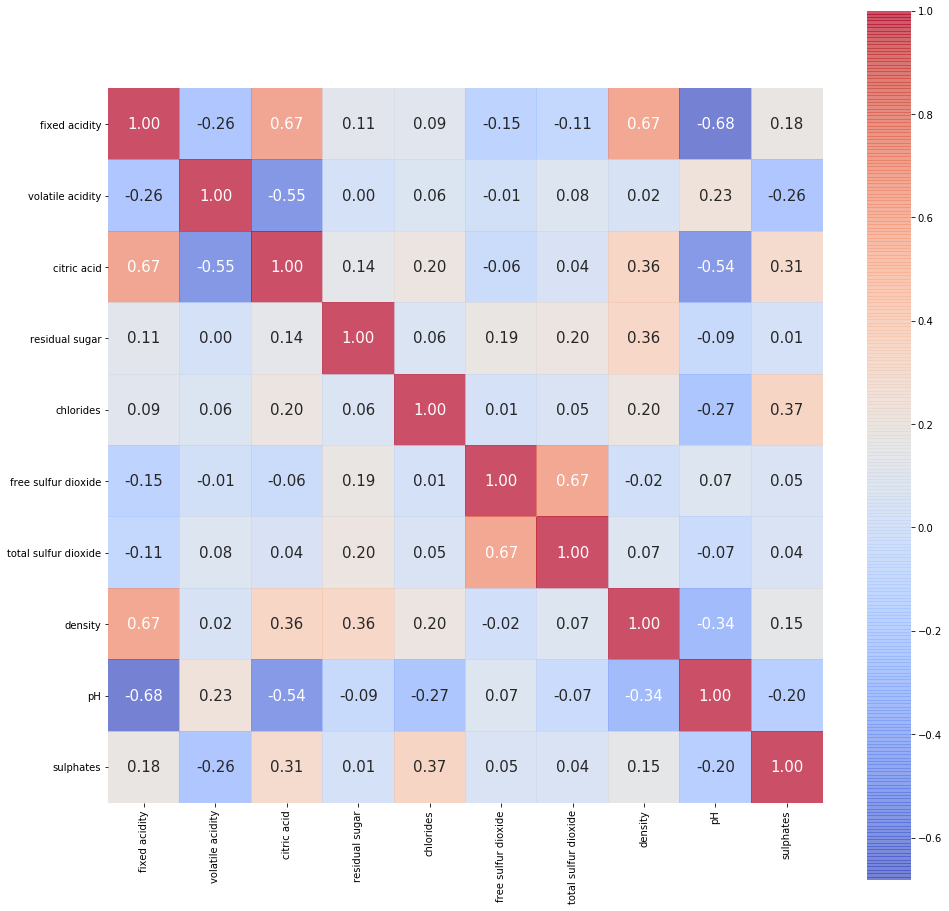

In [91]:
# Analysing the Co-relation
corr = wine[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

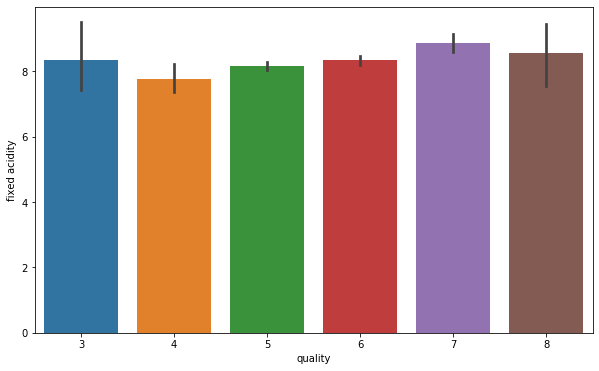

In [92]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

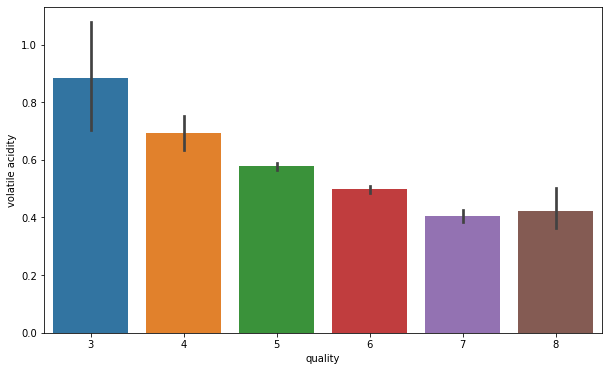

In [93]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

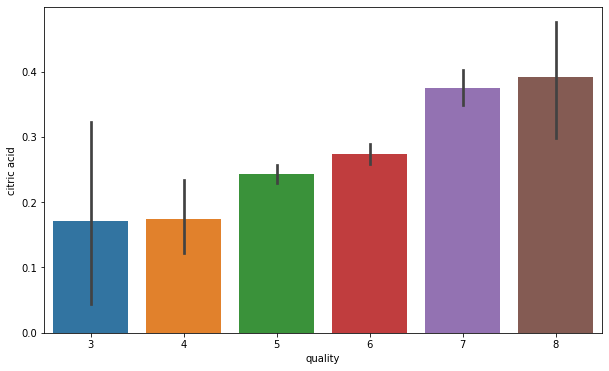

In [94]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

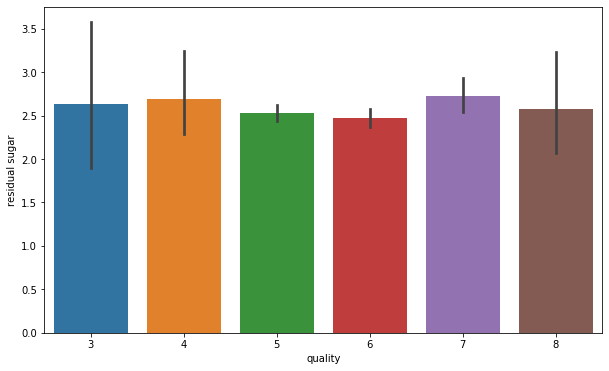

In [95]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

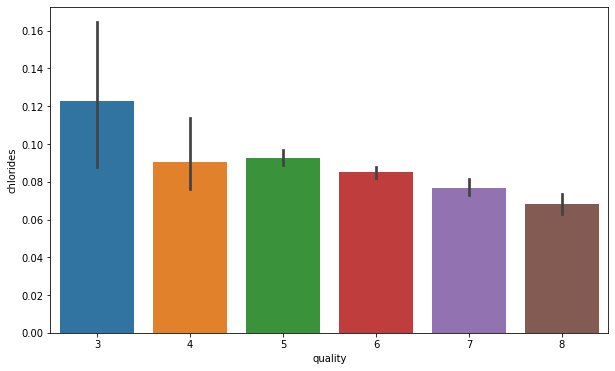

In [96]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

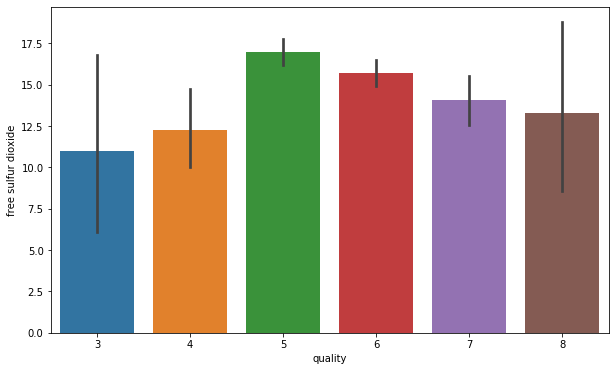

In [97]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

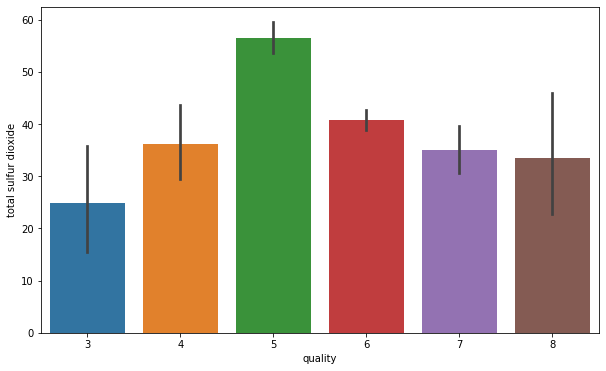

In [98]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

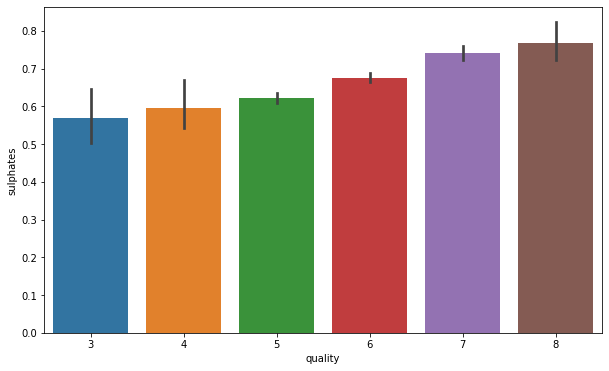

In [99]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

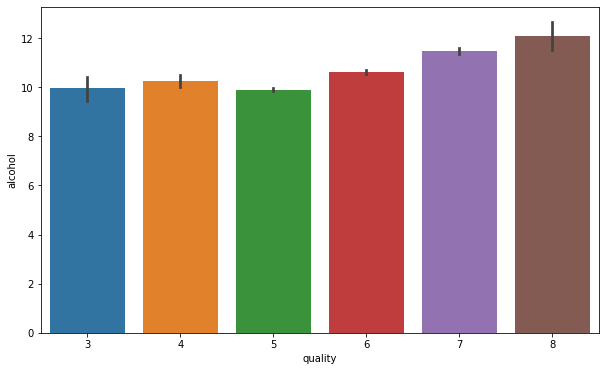

In [100]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [101]:
# Preprocessing Data
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [102]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [103]:
# Bad (quality >=7) becomes 0 and good (<7) becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [104]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

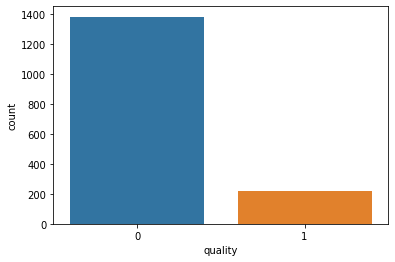

In [105]:
sns.countplot(wine['quality'])

In [121]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [122]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [123]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# Our Training and testing is ready now to perform machine learning algorithm

In [124]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [126]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       413
           1       0.58      0.39      0.46        67

    accuracy                           0.88       480
   macro avg       0.74      0.67      0.70       480
weighted avg       0.86      0.88      0.86       480



In [127]:
#results
accuracy = accuracy_score(y_test,pred_rfc)*100
print(accuracy)

87.5


In [128]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[394  19]
 [ 41  26]]


In [129]:
#Creating a model for KNN

parameters_KNN = {
    "n_neighbors" : [2,5,7,15],
    "weights" : ('uniform','distance'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute'),
    'p': [1,2,5]
}
model_KNN = KNN(n_jobs=-1)
model_KNN_with_best_params = GridSearchCV(model_KNN, parameters_KNN)
model_KNN_with_best_params.fit(X_train,y_train)
model_KNN_best_params = model_KNN_with_best_params.best_params_

In [130]:
model_KNN_best_params

{'algorithm': 'auto', 'n_neighbors': 15, 'p': 5, 'weights': 'distance'}

In [131]:
# Predicting
predictions_KNN = model_KNN_with_best_params.predict(X_test)
print("Predictions:",predictions_KNN[:15])
print("Actual:",y_test[:15])

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual: 803     0
124     0
350     0
682     0
1326    0
976     0
1493    0
706     0
613     0
1587    0
513     1
1505    0
1525    0
1568    0
220     0
Name: quality, dtype: int32


In [132]:
# Result
accuracy = accuracy_score(y_test,predictions_KNN)*100
print(accuracy)

88.95833333333333


In [133]:
#Confusion matrix for the KNN classification
print(confusion_matrix(y_test, predictions_KNN))

[[397  16]
 [ 37  30]]
